In [1]:
from glob import glob 
import numpy as np 

all_paths = glob('/kaggle/input/my-image-eye-2/my_image/*.jpg')
np.random.shuffle(all_paths)
print(len(all_paths))

3027


In [2]:
num_paths = len(all_paths)
train_frac = 0.8 
val_frac = 0.1
train_size = int(train_frac*num_paths)
test_size = int((1-train_frac)*num_paths)
val_size = int(val_frac*train_size)

train_paths, test_paths = all_paths[:train_size], all_paths[train_size:]
train_paths, val_paths = train_paths[:-val_size], train_paths[-val_size:]

print("Number of training data, validation data, testing data corresponding : {}-{}-{} images.".format(len(train_paths), val_size, test_size))

Number of training data, validation data, testing data corresponding : 2179-242-605 images.


In [5]:
import cv2 
from tqdm import tqdm 

IMG_SIZE = 50

def load_data(paths):
    data = []
    for path in tqdm(paths):
        try:
            image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            name = path.split('/')[-1]
            label = name.split('_')[2]
            label = label.split('.')[0]
            data.append([np.array(image), int(label)])
        except:
            pass
    return data

if hasattr(tqdm, '_instances'): tqdm._instances.clear()
    
train_data = load_data(train_paths)
val_data = load_data(val_paths)    
test_data = load_data(test_paths)        

100%|██████████| 606/606 [00:00<00:00, 672.68it/s]


In [6]:
train_images = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255.0
train_labels = np.array([i[1] for i in train_data])

val_images = np.array([i[0] for i in val_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255.0
val_labels = np.array([i[1] for i in val_data])

test_images = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255.0
test_labels = np.array([i[1] for i in test_data])

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(8, 3, activation='relu', padding='same', input_shape=train_images.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))

model.add(Conv2D(32, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))

model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 8)         32        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        2336      
_________________________________________________________________
batch_normalization_2 (Batch (None, 25, 25, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)       

In [ ]:
from keras.callbacks import ModelCheckpoint 

# model.optimizer.learning_rate = 5e-3

checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True, verbose=0)
h = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, batch_size=2, verbose=1, callbacks=[checkpoint])

Train on 2103 samples, validate on 233 samples
Epoch 1/10
2103/2103 [==============================] - 11s 5ms/step - loss: 0.2551 - accuracy: 0.9872 - val_loss: 0.5673 - val_accuracy: 0.9657
Epoch 2/10
2103/2103 [==============================] - 10s 5ms/step - loss: 0.1549 - accuracy: 0.9933 - val_loss: 0.0207 - val_accuracy: 0.9914
Epoch 3/10
2103/2103 [==============================] - 10s 5ms/step - loss: 0.0138 - accuracy: 0.9967 - val_loss: 7.6106e-16 - val_accuracy: 1.0000
Epoch 4/10
2103/2103 [==============================] - 11s 5ms/step - loss: 0.0327 - accuracy: 0.9962 - val_loss: 0.2064 - val_accuracy: 0.9914
Epoch 5/10
 712/2103 [=========>....................] - ETA: 6s - loss: 1.1781e-05 - accuracy: 1.0000

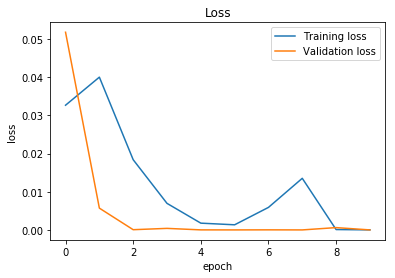

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(h.history['loss'], label='Training loss')
plt.plot(h.history['val_loss'], label='Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()

In [10]:
model.evaluate(test_images, test_labels)

583/583 [==============================] - 0s 187us/step


[2.86194281208479e-07, 1.0]

In [ ]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
print('ok')